In [369]:

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [370]:
import matplotlib.pyplot as plt

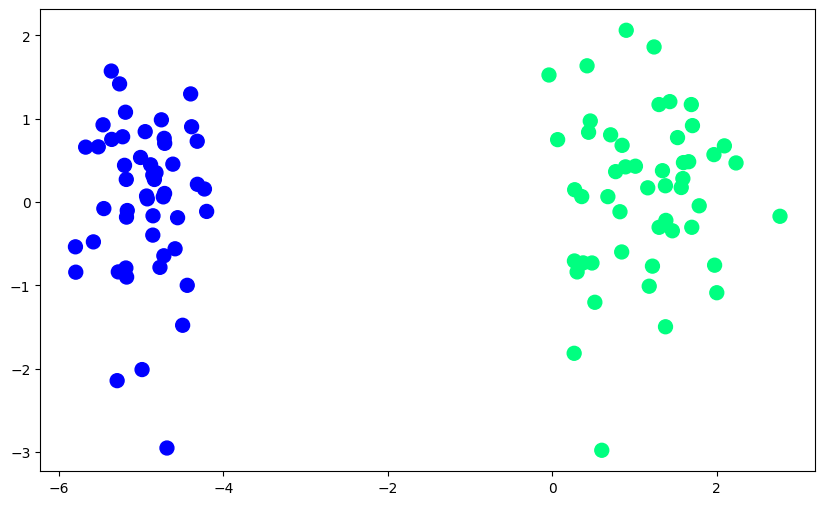

In [371]:

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [372]:
X.shape

(100, 2)

In [ ]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    
    for i in range(epochs):
        #selecting random point from 100 because shape is 100 rows         pt = np.random.randint(0,100)
        y_hat = step(np.dot(X[pt],weights))
        weights = weights + lr*(y[pt]-y_hat)*X[pt]
    
    return  weights[0],weights[1:]

In [374]:
def step(z):
    return 1 if z > 0 else 0

In [375]:
intercept_,coef_ = perceptron(X,y)

In [376]:
print(intercept_)
print(coef_)

1.2000000000000002
[1.1204053  0.40381514]


In [377]:
m = -(coef_[0]/coef_[1])
m

np.float64(-2.7745500252190514)

In [378]:
b = -(intercept_/coef_[1])
b

np.float64(-2.9716568071029252)

In [379]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

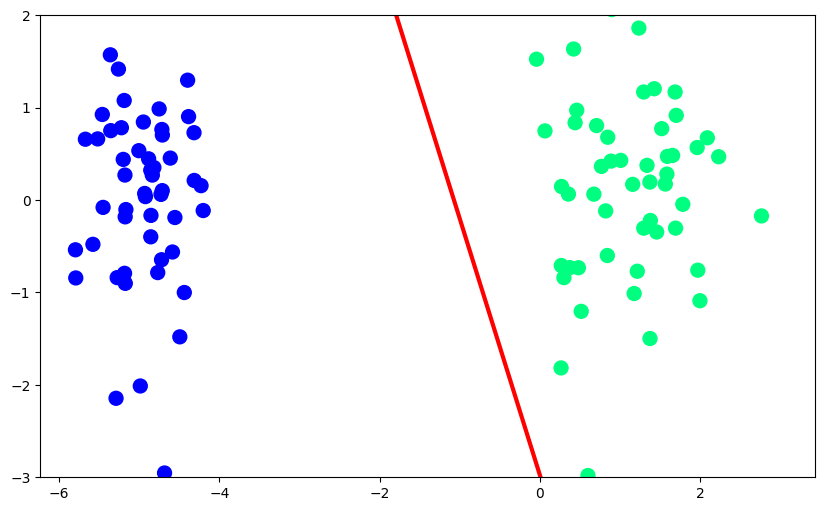

In [380]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [381]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [382]:
lor.coef_

array([[1.77255101, 0.01190507]])

In [383]:
lor.intercept_

array([3.54700273])

In [384]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [385]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

Here red line is from perceptron trick and black line is from sk learn so we can clearly see the differnce it means sk learn uses some differnt trick to classify

(-3.0, 2.0)

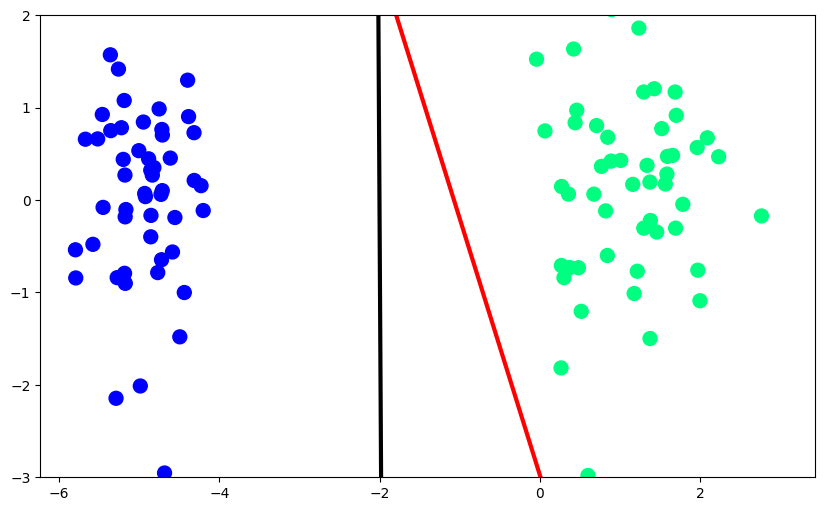

In [386]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [387]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs = 1000
    
    for i in range(epochs):
        #selecting random point from 100 because shape is 100 rows 
        pt = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[pt],weights))
        weights = weights + lr*(y[pt]-y_hat)*X[pt]
    
    return  weights[0],weights[1:]

In [389]:
intercept_,coef_ = perceptron(X,y)

In [390]:
print(coef_)
print(intercept_)

[2.31865528 0.28508793]
2.5846596207354255


In [391]:
m = -(coef_[0]/coef_[1])
print(m)
b = -(intercept_/coef_[1])
print(b)

-8.133123163382429
-9.066183822075995


In [392]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

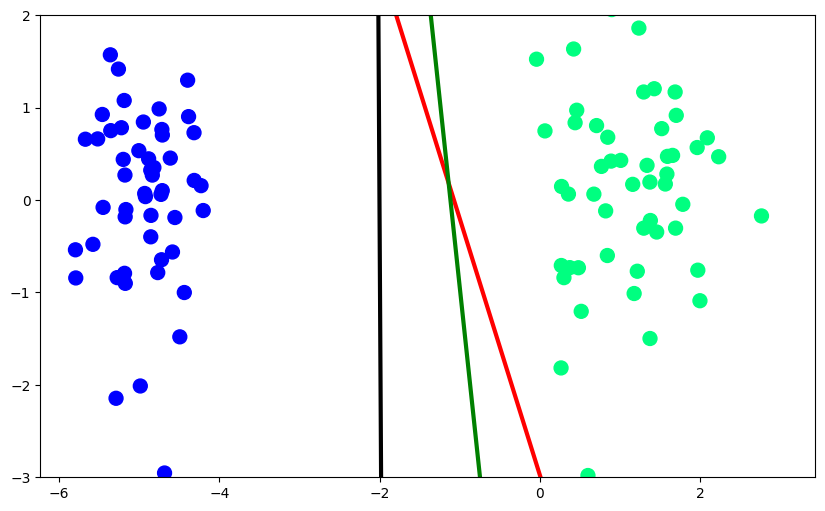

In [393]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) #step 
plt.plot(x_input1,y_input1,color='black',linewidth=3) #sklearn  
plt.plot(x_input2,y_input2,color='green',linewidth=3) #sigmoid
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)